In [7]:
import json
import numpy as np
from gensim.models import Word2Vec


In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [285]:
pairs = json.load(open("dblp_classification_all.json"))


In [286]:
model = Word2Vec.load('./DBLP_sg_500_5_5_15_2_500')
data  = list(model.wv.vocab)

In [287]:
X = []
y = []
for pair in pairs:
    a1 = pair[0].replace("http://dblp.l3s.de/d2r/resource/authors/","author:")
    a2 = pair[1].replace("http://dblp.l3s.de/d2r/resource/authors/","author:")
    isDup = pair[2]
    X.append(np.hstack((model[a1],model[a2])))
    y.append(isDup)


/u4/mwazmy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [288]:
X = np.array(X)
y = np.array(y)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [290]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4793, 1000) (4793,)
(2362, 1000) (2362,)


In [291]:
# Confusion Matrix
def plot_confusion_matrix(cm, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [299]:
# SVM
from sklearn.linear_model import LogisticRegression
def SVM(X_train, y_train, X_test, y_test, C):    
    svm = SVC(C=C)
    svm.fit(X_train, y_train)
    y_train_predicted = svm.predict(X_train)
    y_test_predicted = svm.predict(X_test)
    train_cm = confusion_matrix(y_pred=y_train_predicted, y_true=y_train)
    train_score = svm.score(X_train, y_train)
    test_cm = confusion_matrix(y_pred=y_test_predicted, y_true=y_test)
    test_score = svm.score(X_test, y_test)
    train_average_precision = average_precision_score(y_train, y_train_predicted)
    test_average_precision = precision_score(y_test, y_test_predicted)
    precision, recall, _ = precision_recall_curve(y_test, y_test_predicted)
    test_average_recall = recall_score(y_test, y_test_predicted)
    test_f1_score = f1_score(y_test, y_test_predicted)
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-Score: "+str(test_f1_score))
    print("Precision: "+str(test_average_precision))
    print("Recall: "+str(test_average_recall))
    plot_confusion_matrix(test_cm, test_score)
    

Precision: [0.33700254 0.76829268 1.        ]
Recall: [1.         0.71231156 0.        ]
F1-Score: 0.7392438070404173
Precision: 0.7682926829268293
Recall: 0.7123115577889447


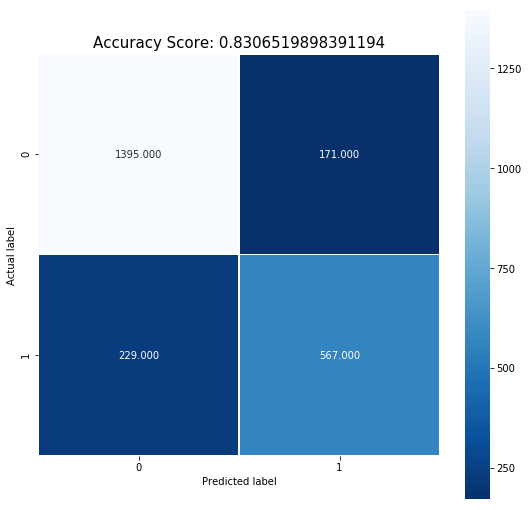

In [300]:
SVM(X_train, y_train, X_test, y_test, 100)

In [301]:
# Logistic Regression
def LG(X_train, y_train, X_test, y_test, C):    
    lg = LogisticRegression(C=C)
    lg.fit(X_train, y_train)
    y_train_predicted = lg.predict(X_train)
    y_test_predicted = lg.predict(X_test)
    train_cm = confusion_matrix(y_pred=y_train_predicted, y_true=y_train)
    train_score = lg.score(X_train, y_train)
    test_cm = confusion_matrix(y_pred=y_test_predicted, y_true=y_test)
    test_score = lg.score(X_test, y_test)
    train_average_precision = average_precision_score(y_train, y_train_predicted)
    test_average_precision = precision_score(y_test, y_test_predicted)
    precision, recall, _ = precision_recall_curve(y_test, y_test_predicted)
    test_average_recall = recall_score(y_test, y_test_predicted)
    test_f1_score = f1_score(y_test, y_test_predicted)
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-Score: "+str(test_f1_score))
    print("Precision: "+str(test_average_precision))
    print("Recall: "+str(test_average_recall))
    plot_confusion_matrix(test_cm, test_score)
    

Precision: [0.33700254 0.69179601 1.        ]
Recall: [1.        0.7839196 0.       ]
F1-Score: 0.734982332155477
Precision: 0.6917960088691796
Recall: 0.7839195979899497


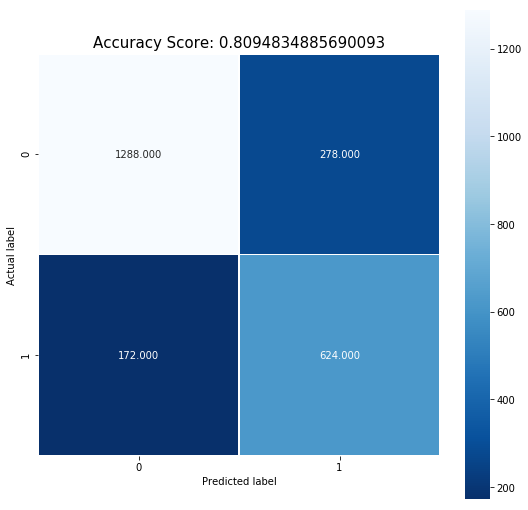

In [302]:
LG(X_train, y_train, X_test, y_test, 10e5)

In [303]:
# Neural Network
def MLP(X_train, y_train, X_test, y_test):    
    mlp = MLPClassifier(solver='adam', alpha=1e-10, hidden_layer_sizes=(7, 2), random_state=1, activation="relu")
    mlp.fit(X_train, y_train)
    y_train_predicted = mlp.predict(X_train)
    y_test_predicted = mlp.predict(X_test)
    train_cm = confusion_matrix(y_pred=y_train_predicted, y_true=y_train)
    train_score = mlp.score(X_train, y_train)
    test_cm = confusion_matrix(y_pred=y_test_predicted, y_true=y_test)
    test_score = mlp.score(X_test, y_test)
    train_average_precision = average_precision_score(y_train, y_train_predicted)
    test_average_precision = precision_score(y_test, y_test_predicted)
    precision, recall, _ = precision_recall_curve(y_test, y_test_predicted)
    test_average_recall = recall_score(y_test, y_test_predicted)
    test_f1_score = f1_score(y_test, y_test_predicted)
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-Score: "+str(test_f1_score))
    print("Precision: "+str(test_average_precision))
    print("Recall: "+str(test_average_recall))
    plot_confusion_matrix(test_cm, test_score)
    

Precision: [0.33700254 0.8125     1.        ]
Recall: [1.         0.88190955 0.        ]
F1-Score: 0.8457831325301206
Precision: 0.8125
Recall: 0.8819095477386935


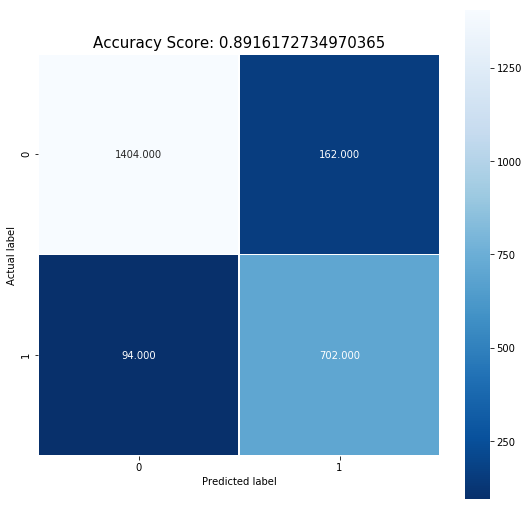

In [304]:
MLP(X_train, y_train, X_test, y_test)

In [317]:
# Training 33% , Testing 67%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)


Precision: [0.33152174 0.56705202 1.        ]
Recall: [1.         0.45948478 0.        ]
F1-Score: 0.5076326002587321
Precision: 0.5670520231213872
Recall: 0.4594847775175644
Precision: [0.33152174 0.54204204 1.        ]
Recall: [1.         0.50725995 0.        ]
F1-Score: 0.5240745221388822
Precision: 0.5420420420420421
Recall: 0.5072599531615926
Precision: [0.33152174 0.62378976 1.        ]
Recall: [1.         0.42248244 0.        ]
F1-Score: 0.503769896676906
Precision: 0.623789764868603
Recall: 0.4224824355971897


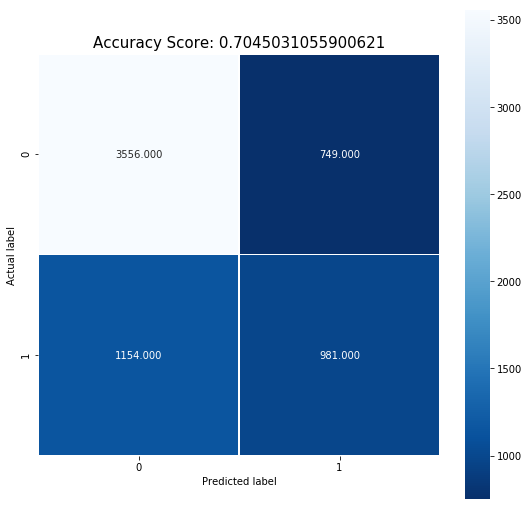

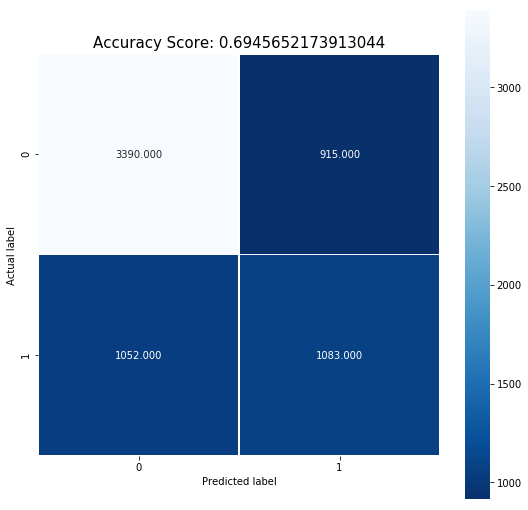

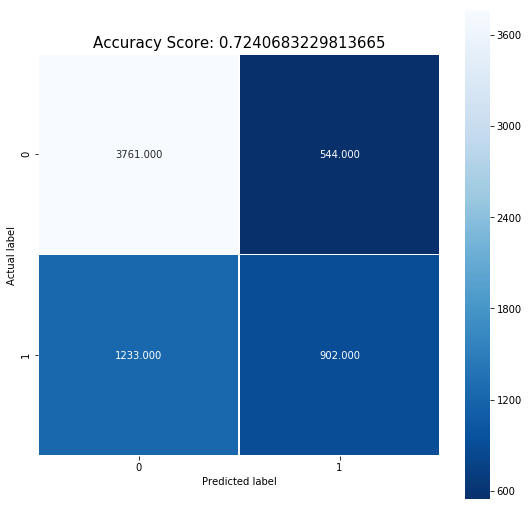

In [318]:
SVM(X_train, y_train, X_test, y_test, 100)
LG(X_train, y_train, X_test, y_test, 10e5)
MLP(X_train, y_train, X_test, y_test)

In [321]:
print(len(y_train))

715
